# Recomendation system - Machine Learning model

- This Recomendation System will recomend TV and movie anime for users. I want to focus on more mainstream title suitable for a general audience. This will reflect in how i choose to clean my dataset for certain features.
- Collaberative filtering based

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Read data

In [2]:
df = pd.read_csv('User_Anime_dataset.csv')

In [3]:
df.head()

,User_Ids,User_Name,Anime_Id,Anime_Name,User_Rating,Genre,Studio,Source
0,13212366.0,Wan_Gui,29978.0,1,2.0,NaN,NaN,NaN
1,13212366.0,Wan_Gui,41457.0,86,7.0,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
2,13212366.0,Wan_Gui,48569.0,86 Part 2,5.0,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
3,13212366.0,Wan_Gui,32998.0,91 Days,7.0,"Action, Drama",Shuka,Original
4,13212366.0,Wan_Gui,38480.0,Toaru Kagaku no Accelerator,6.0,"Fantasy, Supernatural",J.C.Staff,Manga


In [4]:
len(df)

353069

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353069 entries, 0 to 353068
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User_Ids     296231 non-null  float64
 1   User_Name    353069 non-null  object 
 2   Anime_Id     353067 non-null  float64
 3   Anime_Name   353067 non-null  object 
 4   User_Rating  292432 non-null  float64
 5   Genre        286080 non-null  object 
 6   Studio       286080 non-null  object 
 7   Source       286080 non-null  object 
dtypes: float64(3), object(5)
memory usage: 21.5+ MB


In [6]:
df.isna().sum()

User_Ids       56838
User_Name          0
Anime_Id           2
Anime_Name         2
User_Rating    60637
Genre          66989
Studio         66989
Source         66989
dtype: int64

In [7]:
df.Studio.value_counts()

A-1 Pictures                                          17858
J.C.Staff                                             15104
Madhouse                                              14000
Bones                                                 13531
Kyoto Animation                                        8568
                                                      ...  
Kinema Citrus, Ascension, Creators in Pack, Zero-G        1
Anime R, Aubec                                            1
Studio Kingyoiro                                          1
J.C.Staff, Hal Film Maker                                 1
G-angle                                                   1
Name: Studio, Length: 594, dtype: int64

In [8]:
df.Source.value_counts()

Manga           134071
Light novel      69847
Original         38093
Web manga        11482
Visual novel      8697
Game              6742
4-koma manga      6440
Novel             5966
Other             1977
Unknown            957
Mixed media        868
Music              320
Book               268
Card game          265
Picture book        81
Radio                6
Name: Source, dtype: int64

# Preprocessing

- If the data is missing, the statistical power is lost no matter what you do.


- Checking for Anime Source and studio and drop the less common studios & Source types. For example Source: Music, and really small studios that dont produce lots of anime


- Drop all Missing data, the rows that were NaN were mainly missing User_IDs,Studios,Source,Genre.They are missing because, i webscraped 7300 unique TV & Movie anime, and if the anime on a persons list wasnt in the reference anime database, than it wont have matching records for the features like anime_id,genre,studio,source. To remove noisy pattern and avoid “memory error” due to large datasets, we will filter our dataframe of ratings to only popular anime.


- I believe we have a sufficient amount of data that droping the rows wont have a signifigant effect on the Model.


- Remove Studio's with less than 1000 mentions, as i believe these studios are too small to be included.

In [9]:
class Preprocessing:
    def __init__(self,df):
        self.df = df
    
    def first_step(self):
        self.df = df.dropna()
        return self
    
    def second_step(self):
        self.df = self.df.groupby('Studio').filter(lambda x: len(x)> 100)
        return self
    
    def third_step(self):
        self.df = self.df.astype({'User_Ids':'int','Anime_Id':'int','User_Rating':'int'})
        return self
    
    def get_df(self):
        return self.df

In [10]:
df = pd.read_csv('User_Anime_dataset.csv')
preprocessing = Preprocessing(df)
cleaned_df = preprocessing.first_step().second_step().third_step().get_df()
cleaned_df

,User_Ids,User_Name,Anime_Id,Anime_Name,User_Rating,Genre,Studio,Source
1,13212366,Wan_Gui,41457,86,7,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
2,13212366,Wan_Gui,48569,86 Part 2,5,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
3,13212366,Wan_Gui,32998,91 Days,7,"Action, Drama",Shuka,Original
4,13212366,Wan_Gui,38480,Toaru Kagaku no Accelerator,6,"Fantasy, Supernatural",J.C.Staff,Manga
5,13212366,Wan_Gui,6213,Toaru Kagaku no Railgun,4,"Action, Sci-Fi",J.C.Staff,Manga
...,...,...,...,...,...,...,...,...
353064,15782933,10969inseo,45055,Taishou Otome Otogibanashi,9,"Comedy, Romance, Slice of Life",SynergySP,Manga
353065,15782933,10969inseo,21647,Tamako Love Story,8,"Award Winning, Romance, Slice of Life",Kyoto Animation,Original
353066,15782933,10969inseo,16417,Tamako Market,7,Genre: Slice of Life,Kyoto Animation,Original
353067,15782933,10969inseo,37430,Tensei shitara Slime Datta Ken,8,"Action, Adventure, Comedy, Fantasy",8bit,Manga


In [11]:
cleaned_df.Source.value_counts()

Manga           93240
Light novel     47557
Original        26552
Web manga        7611
Visual novel     6144
4-koma manga     4483
Novel            4243
Game             4225
Other            1187
Unknown           612
Mixed media       573
Music             236
Card game         170
Book              104
Picture book       58
Radio               6
Name: Source, dtype: int64

# Exploratory Data Analysis

In [12]:
Anime_rating_count = (cleaned_df.groupby(by=['Anime_Name'])['User_Rating'].count().reset_index()
             .rename(columns = {'Rating': 'TotalRatingCount'})
            [['Anime_Name','User_Rating']])

Text(0, 0.5, 'User Rating Count')

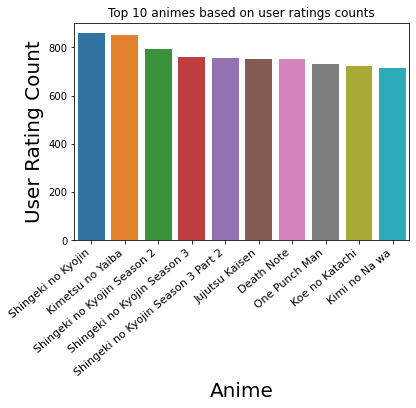

In [13]:
Top_10_Anime = Anime_rating_count[['Anime_Name','User_Rating']].sort_values(by = 'User_Rating',ascending=False).head(10)
ax=sns.barplot(x='Anime_Name',y='User_Rating',data=Top_10_Anime)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=11,rotation=40,ha='right')
ax.set_title('Top 10 animes based on user ratings counts')
ax.set_xlabel('Anime',fontsize=20)
ax.set_ylabel('User Rating Count',fontsize=20)

The most popular animes rated the most highly is, Attack on titan season 1. Infact,all 4 seasons of AOT are in the top 10.

Followed by:
- Demon slayer
- Jujutsu kaisen
- Death Note
- One Punch Man
- A silent voice (Koe No Katachi)
- Your voice (Kimi No Na Wa)

<AxesSubplot:>

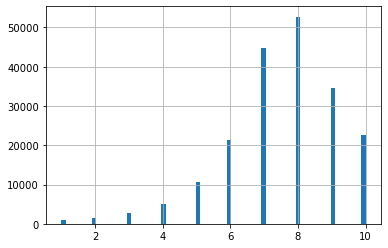

In [14]:
cleaned_df['User_Rating'].hist(bins=70)

In [15]:
ratings_count = pd.DataFrame(cleaned_df.groupby('User_Rating').size(), columns=['count'])
ratings_count

,count
User_Rating,
1,967
2,1533
3,2679
4,4953
5,10767
6,21455
7,44776
8,52731
9,34463


In [11]:
df

,User_Ids,User_Name,Anime_Id,Anime_Name,User_Rating,Genre,Studio,Source
0,13212366.0,Wan_Gui,29978.0,1,2.0,NaN,NaN,NaN
1,13212366.0,Wan_Gui,41457.0,86,7.0,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
2,13212366.0,Wan_Gui,48569.0,86 Part 2,5.0,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
3,13212366.0,Wan_Gui,32998.0,91 Days,7.0,"Action, Drama",Shuka,Original
4,13212366.0,Wan_Gui,38480.0,Toaru Kagaku no Accelerator,6.0,"Fantasy, Supernatural",J.C.Staff,Manga
...,...,...,...,...,...,...,...,...
353064,15782933.0,10969inseo,45055.0,Taishou Otome Otogibanashi,9.0,"Comedy, Romance, Slice of Life",SynergySP,Manga
353065,15782933.0,10969inseo,21647.0,Tamako Love Story,8.0,"Award Winning, Romance, Slice of Life",Kyoto Animation,Original
353066,15782933.0,10969inseo,16417.0,Tamako Market,7.0,Genre: Slice of Life,Kyoto Animation,Original
353067,15782933.0,10969inseo,37430.0,Tensei shitara Slime Datta Ken,8.0,"Action, Adventure, Comedy, Fantasy",8bit,Manga


# Model Deployment

We are going to use item-based collaborative filtering to create our recomendation system. This is were recomendations are based on the similarities between items calculated using the user ratings given.

I will be using KNN as the actual model and using cosine similiarity for nearest neighbour search.

In [12]:
num_users = cleaned_df.User_Ids.nunique()
num_anime = cleaned_df.Anime_Id.nunique()
print(f"There are {num_users} unique users and {num_anime} unique animes in this dataset.")

There are 1199 unique users and 3961 unique animes in this dataset.


In [13]:
# Create a pivot matrix , Creates user_ids - Anime_Id df
anime_movie_features = cleaned_df.pivot(
        index ='Anime_Id',
        columns='User_Ids',
        values='User_Rating').fillna(0)

# Creates User_Id - Anime_Id matrix array
data_matrix = anime_movie_features.to_numpy()

In [14]:
# Creates a sparse matrix
from scipy import sparse

data_sparse = sparse.csr_matrix(anime_movie_features)

In [15]:
# Train Knn model
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(anime_movie_features)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [78]:
query_index = np.random.choice(anime_movie_features.shape[0])
print(query_index)

distance, indices = model_knn.kneighbors(anime_movie_features.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11)

for i in range(0, len(distance.flatten())):
    if i == 0:
        print(f'Recomendation for {anime_movie_features.index[query_index]}:\n')
    else:
        print(f'{i}: {anime_movie_features.index[indices.flatten()[i]]}, with distance of {distance.flatten()[i]}')

3820
Recomendation for 46471:

1: 43969, with distance of 0.47728696879039034
2: 40904, with distance of 0.48920420481166027
3: 43007, with distance of 0.4937950555872649
4: 48556, with distance of 0.4992594961822676
5: 48483, with distance of 0.5210411553613918
6: 47790, with distance of 0.5280756228960022
7: 40938, with distance of 0.5391211028310148
8: 47257, with distance of 0.5418824344650408
9: 44203, with distance of 0.5456605078006954
10: 41812, with distance of 0.5459263532682295


In [17]:
anime_movie_features

User_Ids,11993,13633,111227,111701,115599,131146,136411,143431,161418,173040,...,15754128,15764917,15766450,15767162,15770760,15779518,15780400,15781792,15782611,15782933
Anime_Id,,,,,,,,,,,,,,,,,,,,,
1,9.0,8.0,7.0,10.0,8.0,8.0,8.0,9.0,0.0,0.0,...,10.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,9.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def recomendation(data,movie, n_recomendation):
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
    model_knn.fit(data)

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, actual_result):
    prediction = prediction[actual_result.nonzero()].flatten()
    actual_result = actual_result[actual_result.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual_result))

In [117]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

u,s,vt = svds(train_data_matrix, k = 10)
s_diag_matrix = np.diag(s)
x_pred = np.dot(np.dot(u,s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(x_pred, test_data_matrix)))

User-based CF MSE: 7.547007744516569


In [87]:
cleaned_df

,User_Ids,User_Name,Anime_Id,Anime_Name,User_Rating,Genre,Studio,Source
1,13212366,Wan_Gui,41457,86,7,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
2,13212366,Wan_Gui,48569,86 Part 2,5,"Action, Drama, Sci-Fi",A-1 Pictures,Light novel
3,13212366,Wan_Gui,32998,91 Days,7,"Action, Drama",Shuka,Original
4,13212366,Wan_Gui,38480,Toaru Kagaku no Accelerator,6,"Fantasy, Supernatural",J.C.Staff,Manga
5,13212366,Wan_Gui,6213,Toaru Kagaku no Railgun,4,"Action, Sci-Fi",J.C.Staff,Manga
...,...,...,...,...,...,...,...,...
353064,15782933,10969inseo,45055,Taishou Otome Otogibanashi,9,"Comedy, Romance, Slice of Life",SynergySP,Manga
353065,15782933,10969inseo,21647,Tamako Love Story,8,"Award Winning, Romance, Slice of Life",Kyoto Animation,Original
353066,15782933,10969inseo,16417,Tamako Market,7,Genre: Slice of Life,Kyoto Animation,Original
353067,15782933,10969inseo,37430,Tensei shitara Slime Datta Ken,8,"Action, Adventure, Comedy, Fantasy",8bit,Manga


In [19]:
cleaned_df.User_Rating.mean()

7.54647945949513

# Sparse matrix transformation

- Storage: This transformation is done because its memory efficient to run it like this as it will only now evaluate non-zero for memory.

- Computational speed: In the case of searching in sparse matrix, we need to only check the non-zero elements rather than going through all the sparse matrix elements. It saves computing time by logically designing a data structure traversing non-zero elements

- We have a sparse user-item dataset, because number of 0 elements is greater than non-zero values. 

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

def user_based_recomendation(input_data,input_user_id):
    pivot_users = pd.pivot_table(input_data, index='Anime_Name', columns=['User_Ids'], values=['User_Rating']).T
    sparse_pivot = sparse.csr_matrix(pivot_users.fillna(0))
    user_recs = pw.cosine_similarity(sparse_pivot)
    user_recs_df = pd.DataFrame(user_recs, columns=pivot_users.index.values,
                               index=pivot_users.index.values)
    ## Item rating based cosine similiarity
    usr_cosine_df = pd.DataFrame(user_recs_df[input_user_id].sort_values(ascending=False))
    usr_cosine_df.reset_index(level=0, inplace=True)
    usr_cosine_df.columns = ['UserId','Cosine_sim']
    return usr_cosine_df

In [23]:
from scipy import sparse

data_sparse = sparse.csr_matrix(data_pivot)

Here we will use dense_output=False to have the output as a SciPy sparse matrix, this is a step that we are taking to make sure that our matrix fits in memory, otherwise the output would be a numpy ndarray which isn’t as efficient for storing large and sparse data.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculates similarity between user and anime
similarities_sparse = cosine_similarity(data_sparse, dense_output=False)

Next for every User we need to get the top K most similar Users so that we can look at which Movies they liked and make suggestions - that’s where the actual Collaborative Filtering happens.

In [22]:
def n_indx_sparse(matrix,n):
    """Returns index of top n values in each row in a sparse matrix
        Specify KNN N value"""
    top_n_indx = []
    for le,ri in zip(matrix.indptr[:-1], matrix.indptr[1:]):
        n_row_pick = min(n, ri - le)
        top_n_indx.append(matrix.indices[le + np.argpartition(matrix.data[le:ri], -n_row_pick)[-n_row_pick]])
    return top_n_indx

# Decided on N = 5, so 5 most similar users for each user.
user_user_similarity = n_indx_sparse(similarities_sparse,10)

We have generated out recomendations for each user, so we need to transform our data again to a format thats easier to visualize and process. So we're going to create a dictionary of user similiarities

In [59]:
user_user_similarity_dict = {}
for indx, value in enumerate(user_user_similarity):
    user_user_similarity_dict.update({indx: value.tolist()})

user_similarity_final = {}
for user, similar_user in user_user_similarity_dict.items():
    indx = cleaned_df.index[user]
    values = []
    for value in s_values:
        values.append(cleaned_df.index[value])
        
    user_similarity_final.update({indx: values})

In [60]:
# Transforms our dataset from users: 
user_movies = {}
for user, similar_user, in user_similarity_final.items():
    try:
        del similar_user[similar_user.index(user)]
    except:
        pass
    
    Anime_rec = cleaned_df[(cleaned_df['User_Ids'].isin(similar_user)) & cleaned_df['User_Rating']>=6]
    if Anime_rec.empty:
        Anime_rec = cleaned_df[(cleaned_df['User_Ids'].isin(similar_user)) & cleaned_df['User_Rating']>=5]
    if Anime_rec.empty:
        Anime_rec = cleaned_df[(cleaned_df['User_Ids'].isin(similar_user)) & cleaned_df['User_Rating']>=4]
    Anime_sample = Anime_rec.sample(n=10,random_state=33)
    User_anime.update({user: list(set(Anime_sample))})
    

ValueError: a must be greater than 0 unless no samples are taken

In [61]:
for x, similar_user in user_similarity_final.items():
    anime_rec = cleaned_df[(cleaned_df['User_Ids'].isin(similar_user)) & cleaned_df['User_Rating']>=2]
    
print(anime_rec)

Empty DataFrame
Columns: [User_Ids, User_Name, Anime_Id, Anime_Name, User_Rating, Genre, Studio, Source]
Index: []


In [62]:
for x in user_similarity_final.items():
    print(x)

(1, [48])
(2, [48])
(4, [48])
(5, [48])
(6, [48])
(7, [48])
(8, [48])
(10, [48])
(11, [48])
(12, [48])
(13, [48])
(14, [48])
(15, [48])
(16, [48])
(17, [48])
(18, [48])
(19, [48])
(20, [48])
(22, [48])
(26, [48])
(27, [48])
(29, [48])
(30, [48])
(31, [48])
(32, [48])
(33, [48])
(34, [48])
(35, [48])
(36, [48])
(37, [48])
(38, [48])
(39, [48])
(40, [48])
(42, [48])
(43, [48])
(44, [48])
(45, [48])
(46, [48])
(48, [48])
(51, [48])
(52, [48])
(53, [48])
(54, [48])
(57, [48])
(58, [48])
(60, [48])
(61, [48])
(63, [48])
(64, [48])
(65, [48])
(66, [48])
(68, [48])
(69, [48])
(70, [48])
(71, [48])
(72, [48])
(73, [48])
(74, [48])
(75, [48])
(76, [48])
(77, [48])
(78, [48])
(80, [48])
(81, [48])
(82, [48])
(83, [48])
(85, [48])
(88, [48])
(93, [48])
(94, [48])
(96, [48])
(98, [48])
(100, [48])
(102, [48])
(104, [48])
(105, [48])
(107, [48])
(108, [48])
(109, [48])
(111, [48])
(112, [48])
(114, [48])
(115, [48])
(116, [48])
(117, [48])
(118, [48])
(119, [48])
(120, [48])
(121, [48])
(122, [48])

In [78]:
for x, y in user_similarity_final.items():
    print(y)

[412891]
[6553169]
[5426993]
[7403661]
[4872966]
[289100]
[9522227]
[6469163]
[3632517]
[7017993]
[7137534]
[11236195]
[10894113]
[4516119]
[7031569]
[8563694]
[12806313]
[1069465]
[5426993]
[5718177]
[11559760]
[3654593]
[9845689]
[9044273]
[12603268]
[12357116]
[4872966]
[8255428]
[5123367]
[13155290]
[12479601]
[3768521]
[15504893]
[8815144]
[8562883]
[289100]
[6015756]
[7415776]
[15504893]
[10451568]
[12288600]
[13315052]
[7414332]
[7893081]
[14839253]
[5426993]
[8784155]
[4520916]
[8444639]
[5718177]
[6170712]
[7497539]
[9105007]
[8375894]
[3831869]
[8489140]
[330268]
[161418]
[9346150]
[9037217]
[13388374]
[5426993]
[8923068]
[15504893]
[289100]
[7593582]
[8874182]
[9883482]
[8815144]
[8175326]
[2401659]
[13212366]
[11075967]
[2329127]
[13299982]
[6717032]
[11089386]
[7284798]
[14236900]
[14927691]
[15504893]
[8463457]
[393244]
[10930417]
[9019829]
[4058349]
[5426993]
[12479601]
[7699799]
[3389637]
[161418]
[6307866]
[11297407]
[11978602]
[5476175]
[8652977]
[6922352]
[8513594]
[

# Udemy course notes:

- We want sparse matrix, so that we have something to recomend to the user.
- This is actually a regression problem, because we are trying to predict a rating/score for a user, i.e a recomendation
- We care about the deviation of your rating, i.e the variance more than your personal average rating, You average rating represents your bias.
- So we need to calculate weights on each user, for users that are similar to each other, weights for predicted scores should be higher, wheras if they are not similar, we want the weights to be lower.
- Pearson correlation and cosine similarity are the same in this case because we are working with deviations.
- What if 2 users have 0 movies in common or very few?, well in practice just dont consider them at all. If too few i.e < 5, just dont include them at all. This makes statistical sense, because if we dont have enough data its a unreliable output.
- In practice, just consider the most similar or most correlated users, dont consider ALL users. This works really well, especially when you consider big data. On this line we can pre-compute weights beforehands, i.e compute nearest neighbors best K, for this user-user K is recomended between 25 - 50.
- But a downside to throwing away un-correlated data is just throwing away data, so keeping some negative weights, so sort by absolute correlation. Remember correlation can also be either strongly negative or positive. We just want to throw users who arent correlated at all, or in terms of Cosine similiar, both vectors are orthogonal.
- We want to make recomendations for all N users, this is where we get into big data category, the more users we have to calculate a lot of weights, and so the amount of space the file takes gets larger and requires more ram to process. To solve this, work on a subset of the data, take top N users and top M movies, user who has rated the most movies, and movies that have been the most rated by the users
